## Import Libraries <a name="5"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Read Original Dataset <a name="5"></a>

In [2]:
## Read original dataset
df = pd.read_csv("covtype.csv")
## Print the dimension of the original dataset
print(df.shape)

(581012, 55)


In [3]:
## Print the statistics summary of all variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


## Cover Type Explanation

1.Spruce/Fir
2.Lodgepole Pine
3.Ponderosa Pine
4.Cottonwood/Willow
5.Aspen
6.Douglas-fir
7.Krummholz

## Explorary Data Analysis

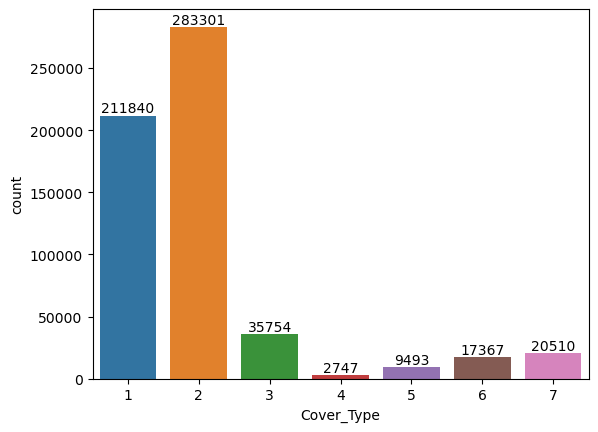

In [4]:
## Check class imbalance
ax = sns.countplot(x=df["Cover_Type"])
for container in ax.containers:
    ax.bar_label(container)

## Random sampling 

Since there is quite heavy class imbalance in the dataset, where only a small portion of measurements (2747) are from cover type 4 and a large portion of measurements(283301) are from cover type 2. So we decided to randomly select 2700 measurements from each cover type to avoid bias. 

In [5]:
grouped = df.groupby('Cover_Type')
sampled_data = pd.DataFrame()
for group_name, group_df in grouped:
    sampled_df = group_df.sample(n=2700, random_state=42)  # use random_state to ensure reproducibility
    sampled_data = pd.concat([sampled_data, sampled_df])

## Merge all binary columns to a single column: Soil_Type and Wilderness_Area

Merge all Soil_Type1 to Soil_Type40 binary columns to a single Soil_Type column.
Merge all Wilderness_Area1 to Wilderness_Area4 binary columns to a single Wilderness_Area column.

In [6]:
df = sampled_data.copy()
category_columns = ["Wilderness_Area", "Soil_Type"]
for i, j in enumerate(category_columns):
  new_df = df.filter(regex=j, axis=1)
  df[j] = new_df.dot(new_df.columns)
  df[j] = df[j].astype('str').str.findall(r"(\d+)").str[-1].astype('int')
  df = df.drop(new_df.columns, axis=1)
df = df.iloc[:,df.columns!="Cover_Type"].merge(df["Cover_Type"], left_index=True, right_index=True)

## Two-way table for Wilderness_Area and Cover_Type

In [7]:
WildernessArea_CoverType = pd.crosstab(df['Wilderness_Area'], df['Cover_Type'])
WildernessArea_CoverType = WildernessArea_CoverType.sort_values(by=list(WildernessArea_CoverType.columns), ascending=False)
print(WildernessArea_CoverType)

Cover_Type          1     2     3     4     5     6     7
Wilderness_Area                                          
1                1361  1320     0     0  1083     0   674
3                1107  1264  1105     0  1617  1183  1705
2                 232    88     0     0     0     0   321
4                   0    28  1595  2700     0  1517     0


As seen from the two-way table for Wilderness_Area and Cover_Type, The number of measurements in Wilderness_Are 3 and Wilderness_Are 4 take up more than 50% of all measurements, so we decided to remove Wilderness_Are 1 and Wilderness_Are 2 as features. 

## Two-way table for Soil_Type and Cover_Type

In [8]:
SoilType_CoverType = pd.crosstab(df['Soil_Type'], df['Cover_Type'])
SoilType_CoverType = SoilType_CoverType.sort_values(by=list(SoilType_CoverType.columns), ascending=False)
print(SoilType_CoverType)

Cover_Type    1    2    3    4    5     6    7
Soil_Type                                     
29          557  647    0    0  299     0  115
23          465  184    0    0  203     3   94
22          327   70    0    0    0     0   19
32          287  308   11    0  146    23  112
33          224  242    0    0  146    78   68
31          156  140    0    0   84     8   24
24          141   81    0    0   15    22   35
30           91  183    0    0  624     0   25
39           88    4    0    0    0     0  751
38           87    6    0    0    0     0  799
40           64    7    0    0    0     0  477
20           43   60    0    0   16    46    0
12           37  242    0    0    0     0    0
13           30  132    3    0  370    97    1
19           30   14    0    0   24     0    0
21           14    0    0    0    0     0    1
35           13    0    0    0    0     0  108
16           10   16   13   50   12    42    0
11            9   96  111   34  186    79    0
10           

As seen from the two-way table for Soil_Type and Cover_Type, The total number of measurements in Soil_Type29, Soil_Type23, Soil_Type32, Soil_Type30, Soil_Type38, Soil_Type10, Soil_Type4 and Soil_Type3 take up more than 50% of all measurements, so we decided to remove are Soil_Type as attributes.

## Keep only relevant attributes for sampled data.

In [28]:
final_df = sampled_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type10',
       'Soil_Type23','Soil_Type29', 'Soil_Type30',
        'Soil_Type32', 'Cover_Type']]#

final_df = final_df.reset_index(drop=True)

## Summary of relevant variables

In [10]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,18900.0,2747.605503,418.209945,1874.0,2373.0,2750.0,3105.00,3849.0
Aspect,18900.0,156.007143,109.798612,0.0,66.0,125.0,258.00,360.0
Slope,18900.0,16.571111,8.504352,0.0,10.0,15.0,22.00,51.0
Horizontal_Distance_To_Hydrology,18900.0,227.596984,210.237713,0.0,67.0,180.0,330.00,1368.0
Vertical_Distance_To_Hydrology,18900.0,51.229418,61.262702,-153.0,5.0,32.0,79.00,543.0
Horizontal_Distance_To_Roadways,18900.0,1718.661376,1327.561999,0.0,750.0,1319.0,2311.25,6935.0
Hillshade_9am,18900.0,212.921217,30.622704,46.0,196.0,220.0,236.00,254.0
Hillshade_Noon,18900.0,218.803386,22.939100,95.0,207.0,222.0,235.00,254.0
Hillshade_3pm,18900.0,134.551111,45.965686,0.0,106.0,138.0,166.00,247.0
Horizontal_Distance_To_Fire_Points,18900.0,1515.324127,1103.184184,0.0,732.0,1265.0,1983.25,7080.0


## Correlation plot

<Axes: >

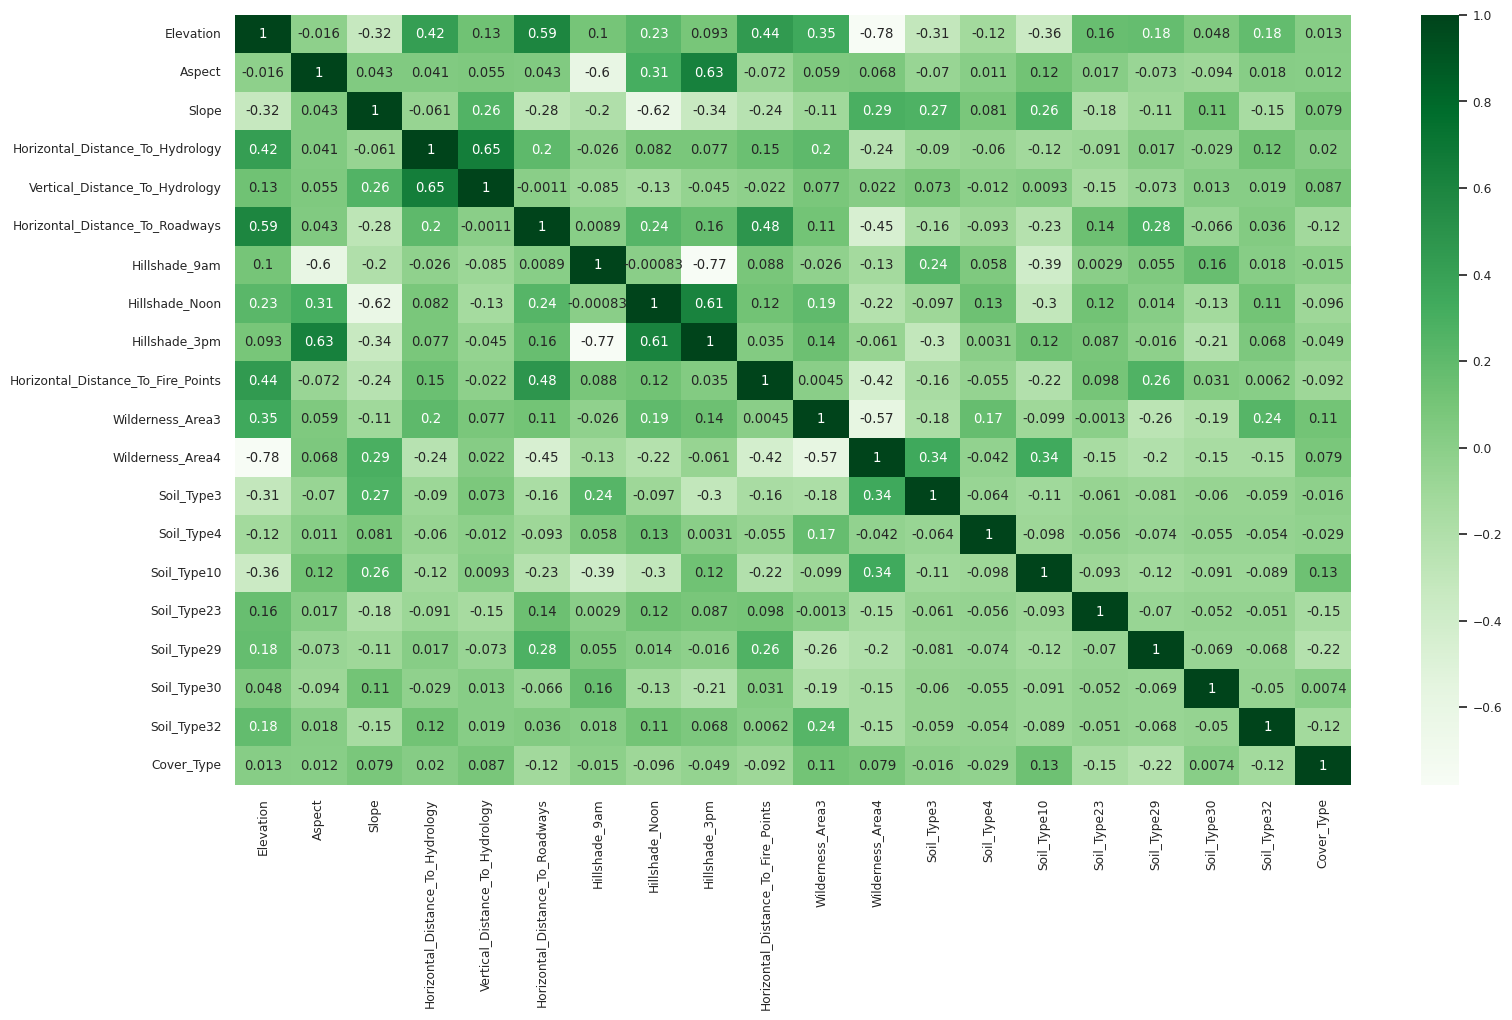

In [11]:
import seaborn as sns
cor = final_df.corr()
plt.figure(figsize=(18,10))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap="Greens")

## Histogram of numeric variables

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>],
       [<Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: >, <Axes: >]], dtype=object)

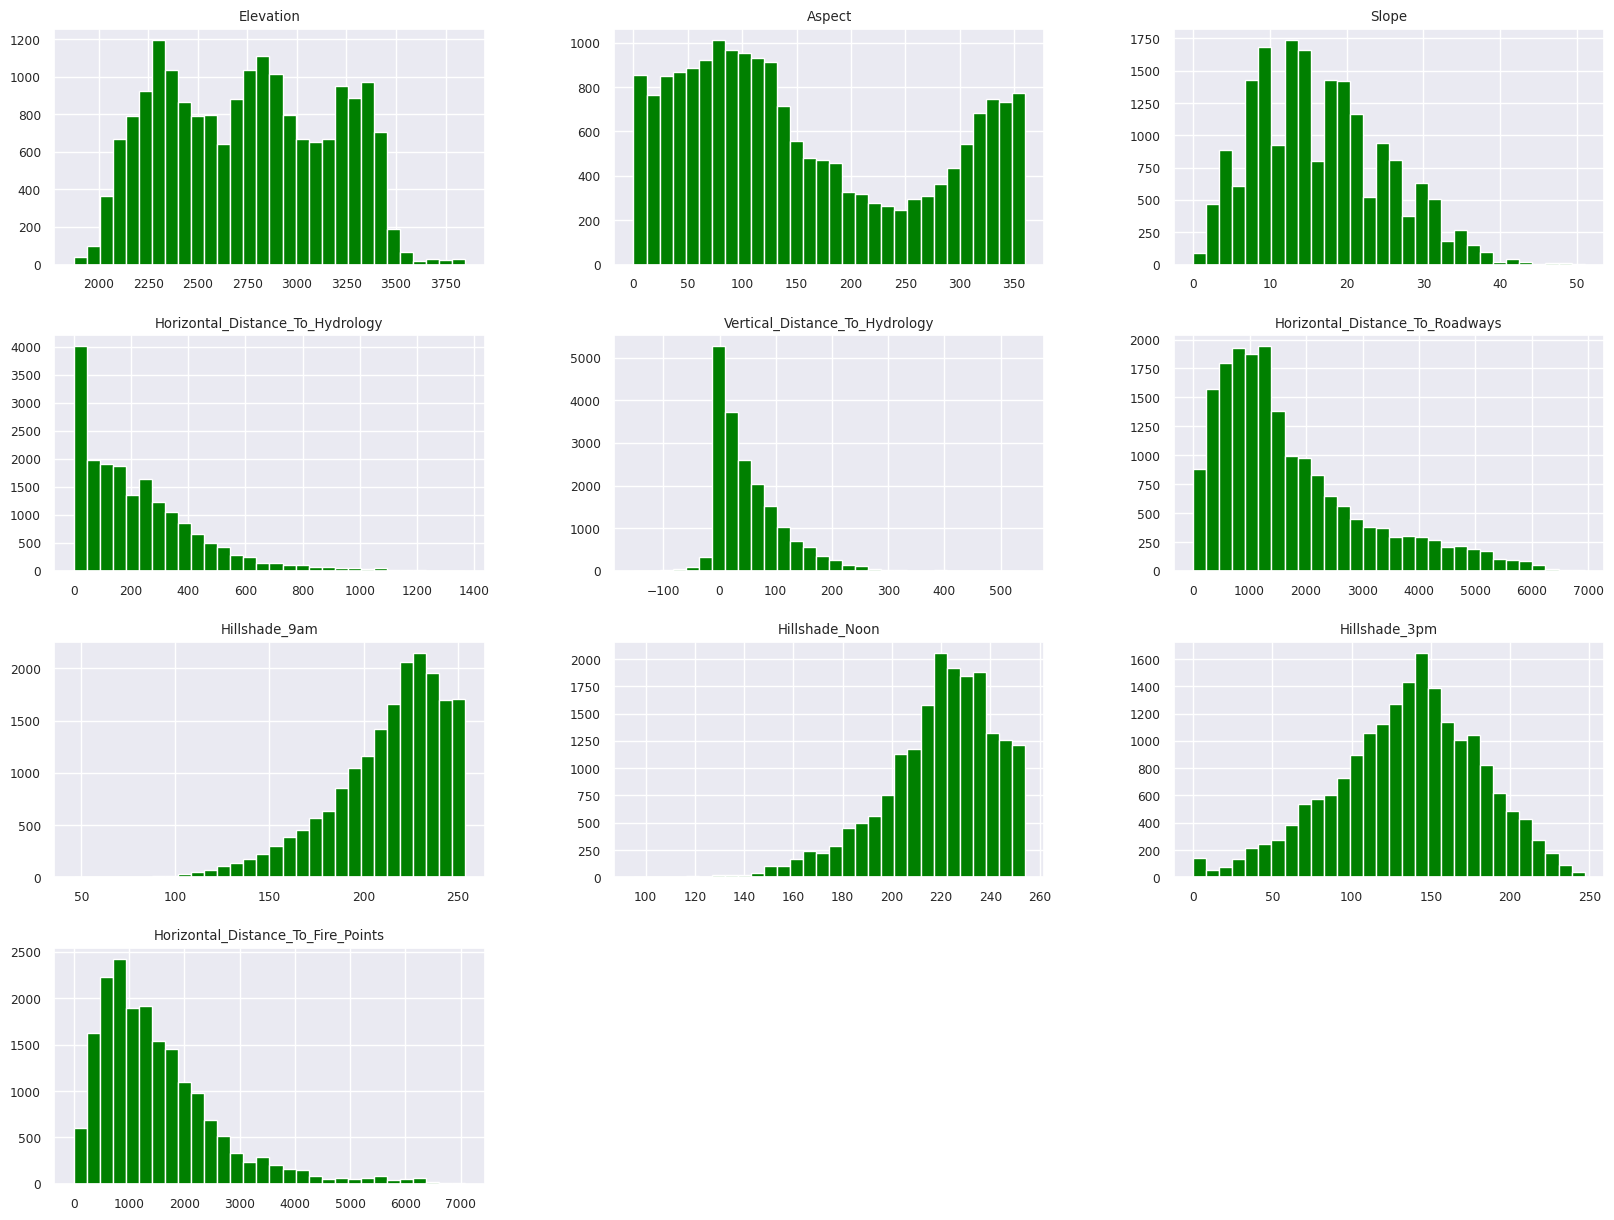

In [12]:
numeric_df = final_df.iloc[:, :-10]
numeric_df.hist(bins=30, figsize=(20, 15), color = "green")

As we can see from the histogram above, the numeric features take on different scales. Those with larger scales may dominate the others in the model, so we will standardize in next section to ensure that all features are given equal consideration in the model. We will also convert Aspect to radians and take cosine transformation.

# Transformations

In [13]:
## Add a constant to vertical distance to hydrology to remove negative values and be able to transform
numeric_df['Vertical_Distance_To_Hydrology'] = numeric_df['Vertical_Distance_To_Hydrology'] + 153

Now all numeric variables have positive non zero values and we can do log transformations.

In [30]:
## Log transform skewed variables and add 1 to remove zeros

## Define the columns to apply log transformation
columns_to_log = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']

## Apply np.log() to the specified columns
for col in columns_to_log:
    numeric_df[col] = np.log(numeric_df[col]+1)

In [15]:
## Square variables to remove negative skewness
numeric_df["Hillshade_9am"] = np.square(numeric_df["Hillshade_9am"])
numeric_df["Hillshade_Noon"] = np.square(numeric_df["Hillshade_Noon"])

In [16]:
## Transform aspect by converting to radians and taking cosine 
numeric_df['Aspect'] = np.cos(np.radians(numeric_df['Aspect']))

# Standardize numeric variables

Need to remove the variance in magnitude of numeric variables.

In [17]:
for column in numeric_df:
    mean = np.mean(numeric_df[column])
    sd = np.std(numeric_df[column])
    numeric_df[column] = (numeric_df[column]-mean)/sd

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>],
       [<Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: >, <Axes: >]], dtype=object)

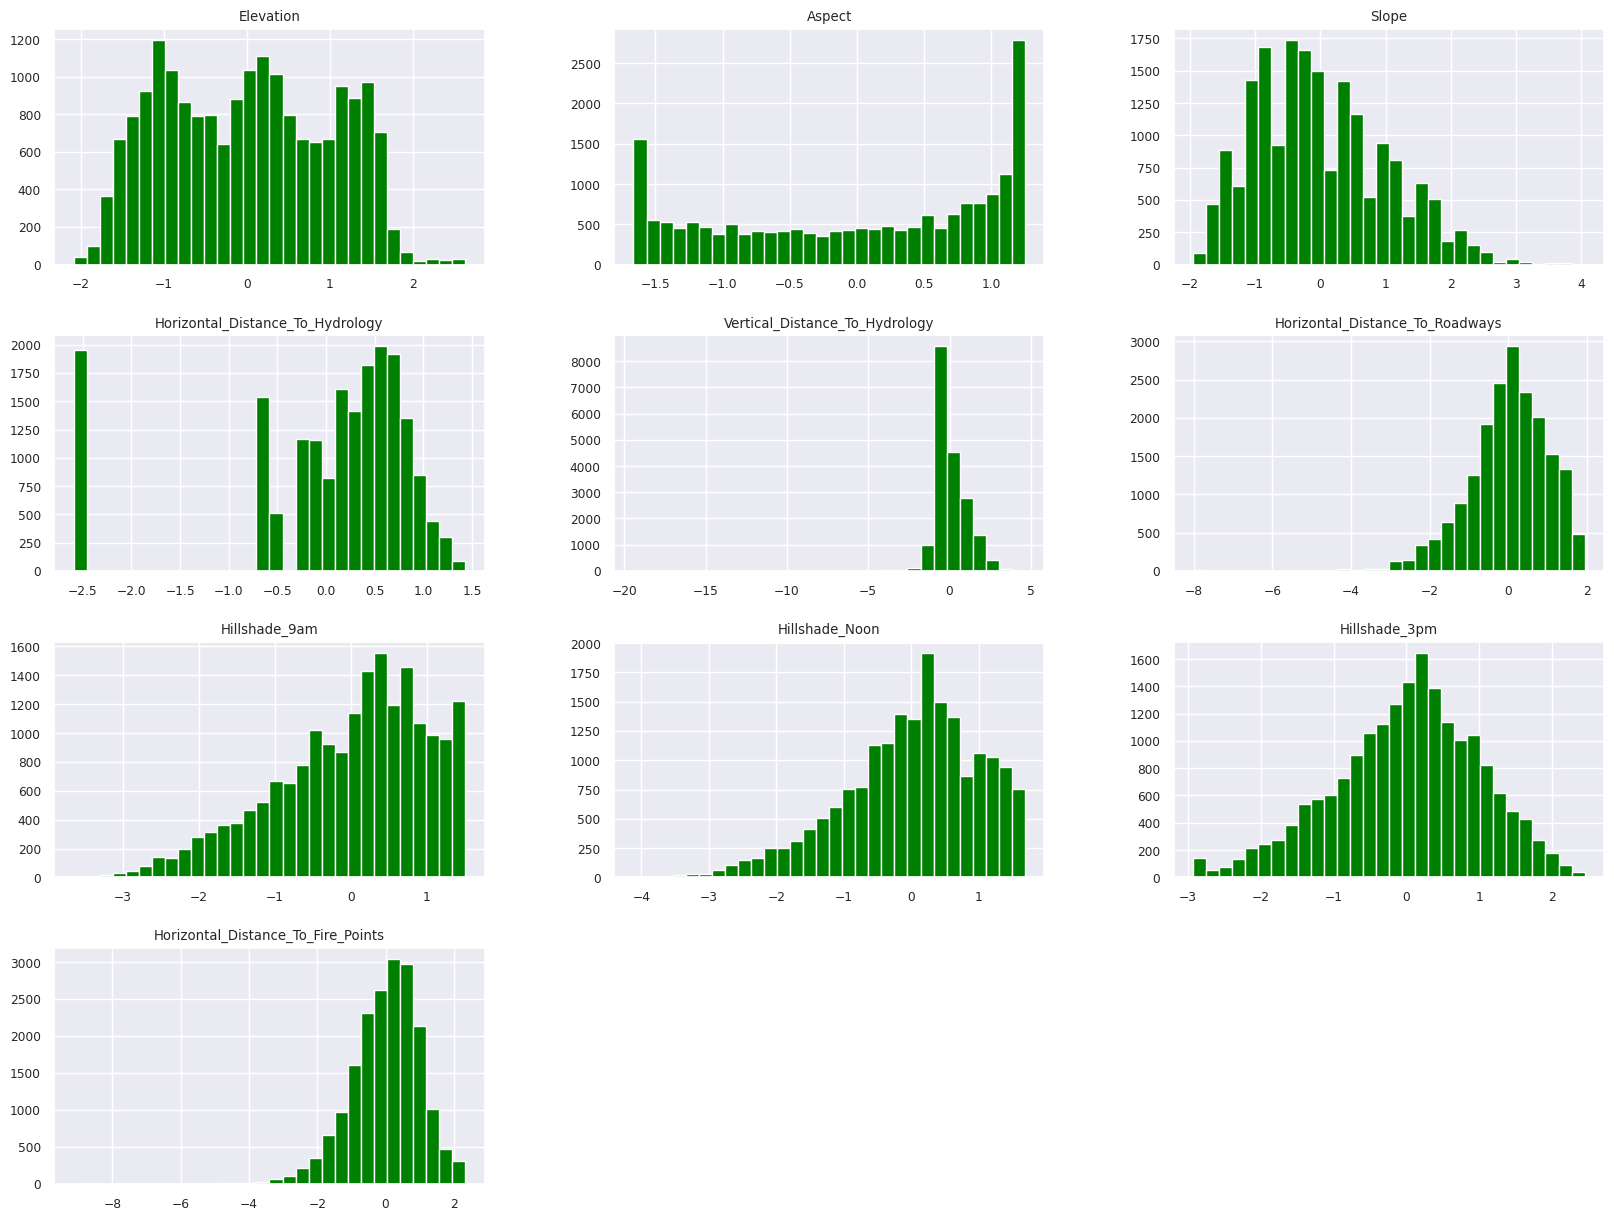

In [18]:
numeric_df.hist(bins=30, figsize=(20, 15), color = "green")

## Combine transformed numeric variables and categorical variables.

In [19]:
## df_combined will be our final dataset for building models.
category_df = final_df.iloc[:, -10:]
df_combined = pd.concat([numeric_df, category_df], axis=1)
df_combined.to_csv('Transformed_Data.csv', index=False)

## Side-by-side boxplots for numeric variables

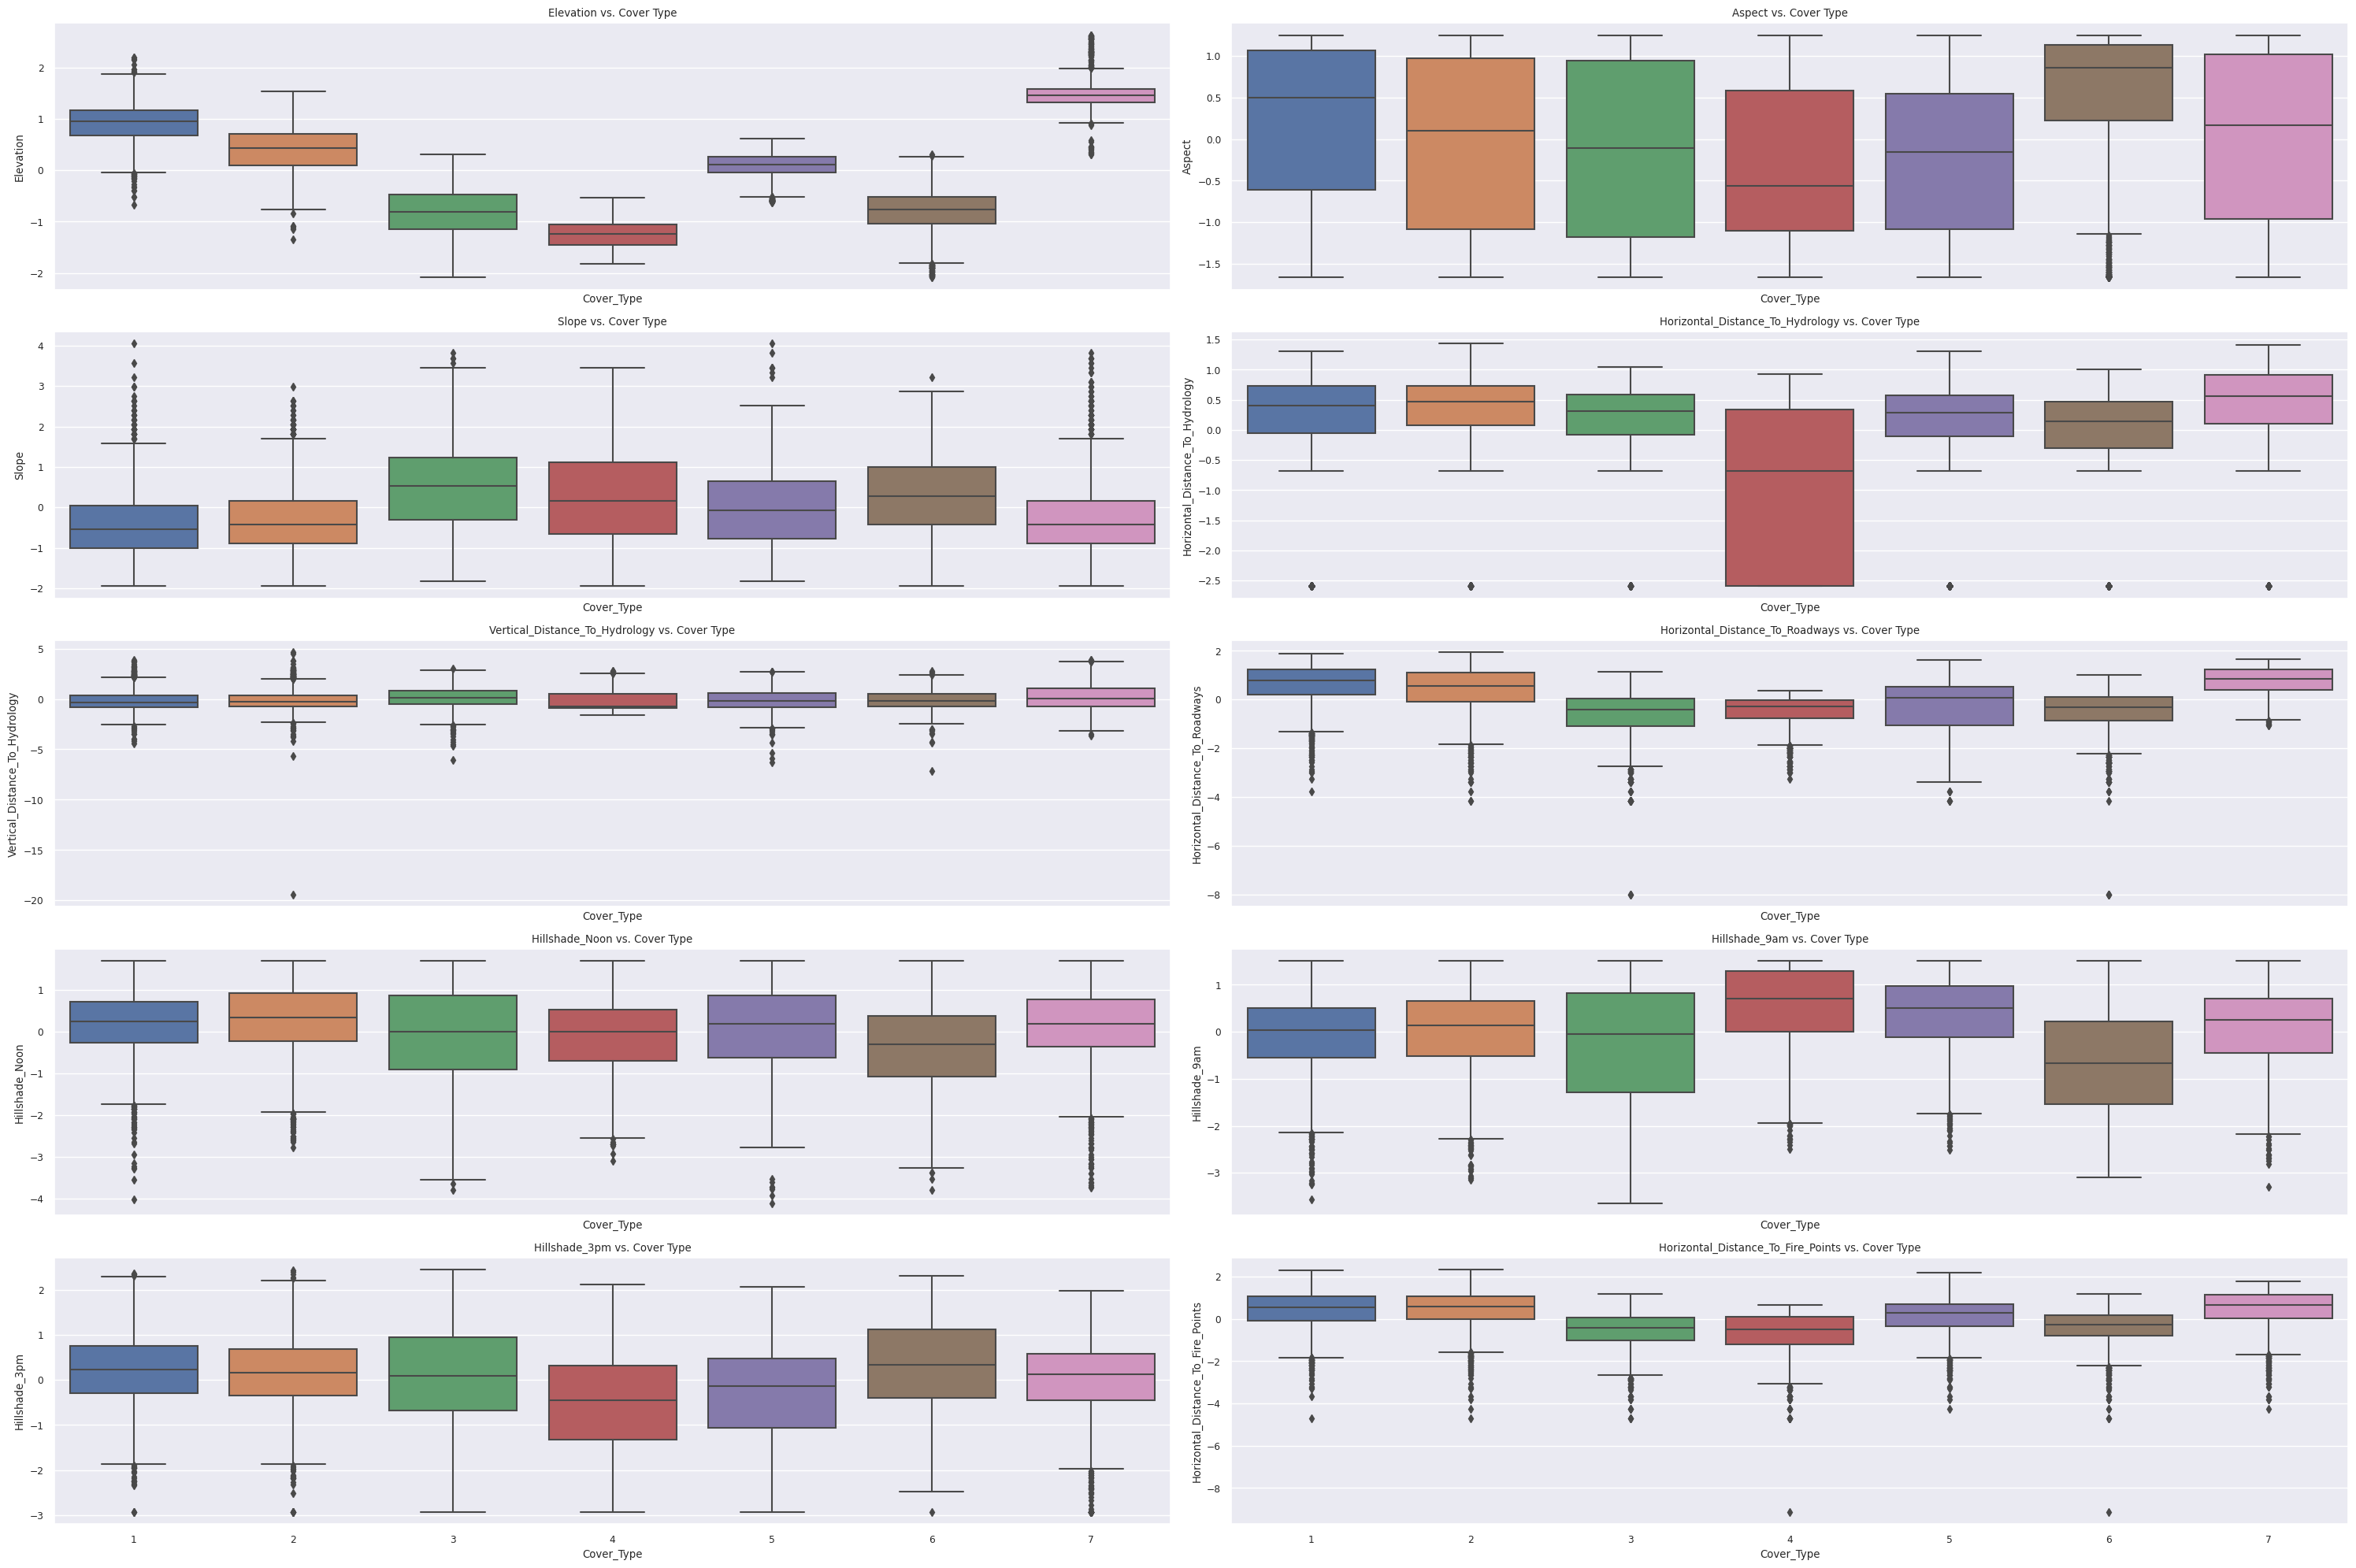

In [31]:
## Define the columns to create boxplots
columns_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                   'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_9am', 'Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']

## Create the subplots
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(30, 20))
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df_combined, x="Cover_Type", y=col, dodge=False, ax=axes[i//2, i%2])

## Add titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f"{columns_to_plot[i]} vs. Cover Type")

## Adjust the layout and display the plot
plt.tight_layout()
plt.show()